# Chapter 10. Introduction to Artificial Neural Networks with Keras

In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

np.random.seed(0)

plt.style.use('seaborn-whitegrid')

In [28]:
%matplotlib inline

In [29]:
%load_ext ipycache

The ipycache extension is already loaded. To reload it, use:
  %reload_ext ipycache


## From biological to artificial neurons

The author briefly described the origins of the field of artificial neural networks (ANN) and how real neurons work; I will skip recounting that section here.

### Logical computations with neurons

The first artificial neuron was proposed as a function with one or more binary inputs and one binary output.
The output is activated when a certain number of inputs are activated.
Several of these neurons working together can reproduce standard logic gates.

### The Perceptron

The *perceptron* was invented in 1957 by Frank Rosenblatt.
It is *threshold logic unit* (TLU) (or a *linear threshold unit*, LTU).
Each input and the  output are numeric values (not binary) and each input has an associated weight.
The TLU computes the weighted sum of the inputs ($z = w_1 x_1 + w_2 x_2 + ... + w_n x_n = \textbf{x}^T \textbf{w}$) and applies a step function to the result to decide the output ($h_w(\textbf{x}) = \text{step}(z)$).
The most common step functions were the *Heaviside step function* and the *sign function*:

$$
\text{heaviside} (z) =
\begin{cases}
    0 \text{ if } z  <  0 \\ 
    1 \text{ if } z \ge 0 \\
\end{cases}
$$

$$
\text{sgn}(z) =
\begin{cases}
    -1 \text{if } z < 0 \\ 
    0  \text{if } z = 0 \\
    1  \text{if } z > 0 \\
\end{cases}
$$

A single TLU can be used for linear classification.
Training the TLU means finding the values for the weights ($w_1, w_2, ..., w_n = \textbf{w}$)

A perceptron is a single layer of TLUs with each TLU connected to all of the input neurons (creating a *fully connected layer*).
The input neurons are just simple passthrough functions where the output equals the input.
An extra *bias neuron* is usually added that always has the value 1 and is connected to each neuron; this helps with the linear algebra for calculating the output of the perceptron:

$$
h_{\textbf{W}, \textbf{b}} = \phi(\textbf{XW} + \textbf{b}) \\
$$

$$
\text{where }
\begin{cases}
    \textbf{X}: \text{represents the matrix of input features; one row per instance, one column per feature} \\
    \textbf{W}: \text{represents the weight matrix from the input neurons to the TLU neurons} \\
    \textbf{b}: \text{represents the weight vector from the bias neurons to the TLU neurons} \\
    \phi: \text{represents the activation function; the step function for TLUs} \\
\end{cases}
$$

The perceptron is trained using *Hebb's Rule*: the connection weight between two neurons tends to increase when they fire simultaneously.
The algorithm also accounts for the accuracy of the prediction; for each training instance, the weights are updated with the following *Perceptron learning rule*:

$$
w_{i,j}^{\text{next step}} = w_{i,j} + \eta (y_j - \hat{y_j}) x_i
$$

$$
\text{where }
\begin{cases}
    w_{i,j}: \text{the connection weight between the } i^{th} \text{ input neuron and } j^{th} \text{output neuron} \\
    x_i: \text{the } i^{th} \text{ input value of the training instance} \\
    \hat{y_j}: \text{the output of the } j^{th} \text{ output neuron for the training instance} \\
    y_j: \text{the target output of the } j^{th} \text{ output neuron for the training instance} \\
    \eta: \text{the learning rate} \\
\end{cases}
$$

The decision boundary for each output neuron is linear, so perceptrons are only capable of linear separation.
Though, when this is possible for the data, the perceptron will converge.

There are some critical limitations to a perceptron, notably that it cannot learn XOR logic, but many of these can be overcome by using multiple layers to create a *Multilayer Perceptron* (MLP).

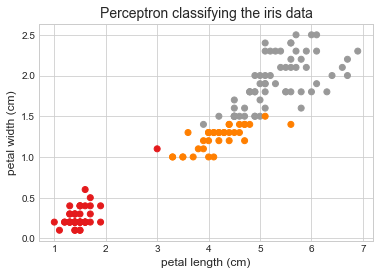

In [30]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Load the iris data and only use petal length and width (cm.).
iris = load_iris()
X = iris.data[:, (2, 3)]
y = iris.target

# Train a perceptron.
per_clf = Perceptron()
per_clf.fit(X, y)

# Plot the prediction results.
plt.scatter(X[:, 0], X[:, 1], c=per_clf.predict(X), cmap='Set1')
plt.title('Perceptron classifying the iris data', fontsize=14)
plt.xlabel(iris.feature_names[2], fontsize=12)
plt.ylabel(iris.feature_names[3], fontsize=12)
plt.show()

## The multilayer perceptron and backpropagation